In [1]:
#Import Necessary Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#unzipping
import zipfile
import os

zip_path = r"C:\Users\HP\Downloads\kagglecatsanddogs_5340.zip"  # Update with actual filename
extract_path = r"C:\Users\HP\Downloads\PetImages"

# Extract the ZIP file if it hasn’t been extracted yet
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(r"C:\Users\HP\Downloads")
    print("Extraction completed.")
else:
    print("Dataset already extracted.")

Dataset already extracted.


In [3]:
#setting file path
data_dir = r"C:\Users\HP\Downloads\PetImages"

In [4]:
#Set Up Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255, 
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [5]:
#Verify That Only Images Exist in the Dataset Directory
import os
from PIL import Image

data_dir = r"C:\Users\HP\Downloads\PetImages"  # Update with your actual path

for category in ["Cat", "Dog"]:
    folder_path = os.path.join(data_dir, category)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Check if the file is a valid image
        except (IOError, SyntaxError):
            print(f"Corrupt or non-image file detected: {file_path}")
            os.remove(file_path)  # Remove the invalid file

C:\Users\HP\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [6]:
#Remove Empty or Corrupt Images
for category in ["Cat", "Dog"]:
    folder_path = os.path.join(data_dir, category)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.getsize(file_path) == 0:  # Remove empty files
            print(f"Removing empty file: {file_path}")
            os.remove(file_path)

In [7]:
#Define CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 413s 653ms/step - accuracy: 0.5800 - loss: 0.7477 - val_accuracy: 0.6969 - val_loss: 0.5832
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 395s 631ms/step - accuracy: 0.7482 - loss: 0.5129 - val_accuracy: 0.7657 - val_loss: 0.5010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 407s 649ms/step - accuracy: 0.8069 - loss: 0.4141 - val_accuracy: 0.7985 - val_loss: 0.4372
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 419s 668ms/step - accuracy: 0.8475 - loss: 0.3401 - val_accuracy: 0.8245 - val_loss: 0.3982
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 437s 699ms/step - accuracy: 0.9047 - loss: 0.2366 - val_accuracy: 0.8173 - val_loss: 0.4647
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 384s 612ms/step - accuracy: 0.9492 - loss: 0.1333 - val_accuracy: 0.8283 - val_loss: 0.5028
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 376s 600ms/step - accuracy: 0.9790 - loss: 0.0644 - val_accuracy: 0.8031 - val_loss: 0.6518
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 378s 603ms/step - accuracy: 0.9910 - loss: 0.03

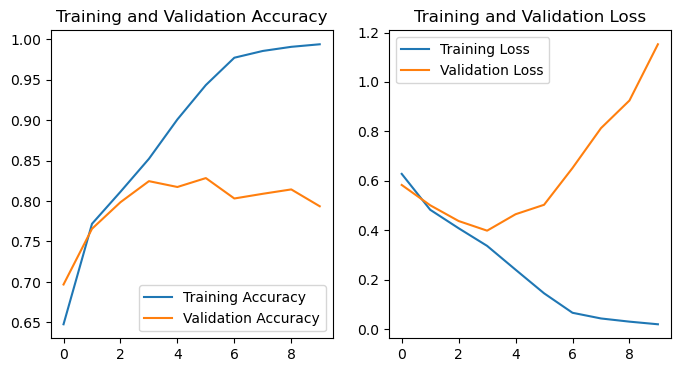

In [18]:
#Evaluate the Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.show()

In [38]:
#make predictions
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    prediction = model.predict(img_array)
    
    if prediction[0][0] > 0.5:
        print("It's a Dog!")
    else:
        print("It's a Cat!")

# Test with an image
predict_image(r"C:\Users\HP\Downloads\PetImages\9980.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
It's a Cat!
